In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NBAData.features import *

### *basic outline:* team/player data -> assign rest days -> assign_postion (encode it) -> assign if starter (encode it) -> opp/team encode it -> prop features -> player prop matchup data

In [32]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('PLAYER_DATA/POINTS.csv')
data.drop(columns = ['Unnamed: 0', 'AWAY_GAME', 'GAME_DATE', 'WL'], inplace=True)
data.head()



,PLAYER_NAME,HOME_GAME,MIN,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,TOV,PointsPerShot,OFF_RATING,DEF_RATING,OREB_PCT,DREB_PCT,REB_PCT,AST_PCT,USG_PCT,TS_PCT,PACE,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,TEAM_PACE,OPP_PACE,CENTER,FORWARD,GUARD,TEAM_ATL,TEAM_BKN,TEAM_BOS,TEAM_CHA,TEAM_CHI,TEAM_CLE,TEAM_DAL,TEAM_DEN,TEAM_DET,TEAM_GSW,TEAM_HOU,TEAM_IND,TEAM_LAC,TEAM_LAL,TEAM_MEM,TEAM_MIA,TEAM_MIL,TEAM_MIN.1,TEAM_NOP,TEAM_NYK,TEAM_OKC,TEAM_ORL,TEAM_PHI,TEAM_PHX,TEAM_POR,TEAM_SAC,TEAM_SAS,TEAM_TOR,TEAM_UTA,TEAM_WAS,OPP_ATL,OPP_BKN,OPP_BOS,OPP_CHA,OPP_CHI,OPP_CLE,OPP_DAL,OPP_DEN,OPP_DET,OPP_GSW,OPP_HOU,OPP_IND,OPP_LAC,OPP_LAL,OPP_MEM,OPP_MIA,OPP_MIL,OPP_MIN,OPP_NOP,OPP_NYK,OPP_OKC,OPP_ORL,OPP_PHI,OPP_PHX,OPP_POR,OPP_SAC,OPP_SAS,OPP_TOR,OPP_UTA,OPP_WAS,DAYS_OF_REST,MATCHUP_AVG_PTS_LAST_3,GAMES_VS_OPP,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,STARTER
0,Joe Johnson,1,2,2,0,0,1,1,1.000,0,0,0.000,0,0,0.0,0,2.000,80.0,180.0,0.000,0.000,0.000,0.000,0.200,1.000,123.08,109.988109,8.0,3.0,53.0,0.391304,100.92,102.56,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,1,0.20,0.20,0.20,2.00,2.0,2.0,NaN,NaN,NaN,2.0,NaN,0
1,LeBron James,1,37,34,5,11,13,23,0.565,5,11,0.455,3,6,0.5,4,1.326,102.4,104.8,0.028,0.238,0.141,0.250,0.322,0.663,109.72,98.821082,9.0,2.0,50.0,0.440860,115.36,114.20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,34.0,1,0.32,0.32,0.32,34.00,34.0,34.0,NaN,NaN,NaN,34.0,NaN,1
2,LeBron James,1,37,25,5,2,8,18,0.444,5,9,0.556,4,4,1.0,5,1.265,106.4,114.1,0.000,0.057,0.026,0.263,0.284,0.633,102.48,102.179837,8.0,2.0,47.0,0.488372,102.76,102.32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.0,25.0,1,0.30,0.30,0.30,29.50,29.5,29.5,6.36,6.36,6.36,29.5,NaN,1
3,LeBron James,1,40,19,6,6,7,19,0.368,4,9,0.444,1,2,0.5,3,0.956,112.6,115.1,0.000,0.125,0.071,0.207,0.237,0.478,103.03,119.000787,13.0,4.0,49.0,0.450000,101.68,106.92,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,19.0,1,0.28,0.28,0.28,26.00,26.0,26.0,7.55,7.55,7.55,26.0,NaN,1
4,LeBron James,1,38,26,8,3,10,22,0.455,1,10,0.100,5,5,1.0,7,1.074,123.0,109.3,0.031,0.050,0.042,0.296,0.348,0.537,94.23,116.016427,10.0,1.0,36.0,0.425287,97.40,95.68,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,26.0,1,0.29,0.30,0.30,23.33,26.0,26.0,3.79,6.16,6.16,26.0,NaN,1


In [28]:
list(data.columns)

['PLAYER_NAME',
 'HOME_GAME',
 'AWAY_GAME',
 'GAME_DATE',
 'WL',
 'MIN',
 'PTS',
 'AST',
 'REB',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'TOV',
 'PointsPerShot',
 'OFF_RATING',
 'DEF_RATING',
 'OREB_PCT',
 'DREB_PCT',
 'REB_PCT',
 'AST_PCT',
 'USG_PCT',
 'TS_PCT',
 'PACE',
 'OPP_DEF_RATING',
 'OPP_STL',
 'OPP_BLK',
 'OPP_REB',
 'OPP_FG_PCT',
 'TEAM_PACE',
 'OPP_PACE',
 'CENTER',
 'FORWARD',
 'GUARD',
 'TEAM_ATL',
 'TEAM_BKN',
 'TEAM_BOS',
 'TEAM_CHA',
 'TEAM_CHI',
 'TEAM_CLE',
 'TEAM_DAL',
 'TEAM_DEN',
 'TEAM_DET',
 'TEAM_GSW',
 'TEAM_HOU',
 'TEAM_IND',
 'TEAM_LAC',
 'TEAM_LAL',
 'TEAM_MEM',
 'TEAM_MIA',
 'TEAM_MIL',
 'TEAM_MIN.1',
 'TEAM_NOP',
 'TEAM_NYK',
 'TEAM_OKC',
 'TEAM_ORL',
 'TEAM_PHI',
 'TEAM_PHX',
 'TEAM_POR',
 'TEAM_SAC',
 'TEAM_SAS',
 'TEAM_TOR',
 'TEAM_UTA',
 'TEAM_WAS',
 'OPP_ATL',
 'OPP_BKN',
 'OPP_BOS',
 'OPP_CHA',
 'OPP_CHI',
 'OPP_CLE',
 'OPP_DAL',
 'OPP_DEN',
 'OPP_DET',
 'OPP_GSW',
 'OPP_HOU',
 'OPP_IND',
 'OPP_LAC',
 'O

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, r2_score

# Prepare the data for training
exclude = ['PLAYER_NAME', 'GAME_DATE', 'PTS', 'WL', 'FGM', 'FG3M', 'FTM',  'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'DEF_RATING', 
    'OPP_STL', 'OPP_BLK','OPP_REB','OPP_FG_PCT', 'AST_PCT']
features = [col for col in data.columns if col not in exclude]
target = 'PTS'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
XGB_model = xgb.XGBRegressor()
XGB_model.fit(X_train, y_train)
pred = XGB_model.predict(X_test)



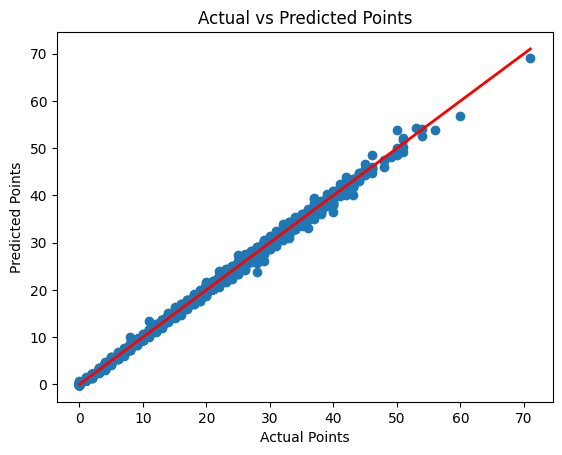

In [36]:
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()
